<a href="https://colab.research.google.com/github/cedamusk/AI-N-ML/blob/main/Copy_of_Weighted_Logistic_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weighted Logistic Regression
##Importing Required libraries
1. NumPy-Handles numerical operations and arrays.
2. LogisticRegression-The core classification model.
3. Metris from `sklearn.metrics`-Used for evaluating model performance:
  *`accuracy_score`-Measures overall correctness.
  *`precision_score`- Determines how many predicted positives were actually positive.
  *`recall_score`-Measures the ability to capture actual positives.
  *`f1_score`-Balances precision and recall.
  *`roc_curve` &`auc`-Used to evaluate model performance via the ROC curve.
  *`confusion_matrix`-Shows the distribution of correct and incorrect predictions.

4. Matplotlib-Visualizaes performance metrics.
5. Seaborn-Enhances data visualization.
6. Train-Test split- Splits data into training and testing sets.

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


## Setting the Random seed
* This cell ensures reproducibility by setting the random seed for NumPy.
* Many mchine learning processes involve randomization (e.g., dataset splitting, weight initialization).
* A fixed seed ensures that the results remain consistent across multiple runs.
* This is crucial for debugging and comparing model performance.

In [2]:
np.random.seed(42)


## Generating an imbalanced dataset
* This function, `generate_imbalanced_data()` creates a synthetic dataset with a class imbalance, which is useful for testing Weighted Logistic Regression.

1.**Define class proportions**
* 70% of samples belong to Class 0.
* 30% belong to Class 1 (making the dataset imbalanced).

2. **Generate data for each class**
* `X1`: Features for Class 0, drawn from a nomral distribution with `mean=2` and `std=1`.
* `X2`: Features for Class 1, drawn from a normal distribution with `mean=4` and `std=1.5`
* These differences in means and standard deviations create separable classes.

3. **Stack data**
* `X`: Combines features sets from both classes (`vstack`).
*`y`: Combines corresponding labels (`hstack`)

In [3]:
def generate_imbalanced_data(n_samples=1000):
  n_class_1=int(n_samples*0.7)
  n_class_2=n_samples-n_class_1

  X1=np.random.normal(loc=2, scale=1, size=(n_class_1, 2))
  y1=np.zeros(n_class_1)

  X2=np.random.normal(loc=4, scale=1.5,size=(n_class_2, 2))
  y2=np.ones(n_class_2)

  X=np.vstack((X1, X2))
  y=np.hstack((y1, y2))

  return X, y

In [4]:
X, y=generate_imbalanced_data(1000) #Generates a synthetic dataset with 1,000 samples


## Splitting the dataset
This cell splits the imbalanced dataset into training and test sets using an 80-20 split.

*`X_train, X_test`: Feature matrices for training and tesing.
* `y_train, y_test`: Corresponding target labels.
* `test_size=0.2`: Reserves 20% of the data (200 samples) for testing.
*`random_state=42`: Ensures reproducibility of the split.

In [5]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

## Computing class weights
* This cell calculates weights to handle imbalanced data in logistic regression

* `np.bincount(y_train.astype(int))`: Counts occurrences of each class in `y_train`.

* `len(y_train)/(2*class_counts)`: Computes weights inversely proportional to class frequency.

* `dict(enumerate(...))`: Converts the computed weights into a dictionary format `{0: weight_0, 1: weight_1}`


In [6]:
class_weights=dict(enumerate(len(y_train)/(2*np.bincount(y_train.astype(int)))))

## Training the weighted logistic regression model

* This cell initializes and trains a ogistic regression model with class weights to handle the imbalanced dataset

* `class_weight=class_weights`: Adjusts the model's sensitivity to class imbalance by assigning higher weight to the minroity class.

* `random_state=42`: Ensures reproducibility of model training.

* In standard logistic regression, an imbalanced dataset may cause the model to favor the majority class, leading to poor performance on the minority class.
* Using class weights makes the model pay more attention to te underrepresented class, improving overall balance in predictions.

In [7]:
weighted_model=LogisticRegression(class_weight=class_weights, random_state=42)
weighted_model.fit(X_train, y_train)

LogisticRegression(class_weight={0: np.float64(0.718132854578097),
                                 1: np.float64(1.646090534979424)},
                   random_state=42)

## Training unweighted logistic regression model
* This cell initializes and trains a standard logistic model without class weighting as a baseline for comparison.

* This model assumes equal importance for both classes, which can lead to poor performance if the dataset is imbalanced (favouring the majority class).

* By comparing this model with the weighted version, we can quantify the impact of class balancing on model performance.

In [8]:
unweighted_model=LogisticRegression(random_state=42)
unweighted_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Predictions using the weighted model
* This cell generates predictions from weighted logistic regression model on the test set.
1. `weighted_pred=weighted_model.predict(X_test)`:
  * Predicts the class labels (0 or 1) for the test set.

2. `weighted_pre_proba=weighted_model.predict_proba(X_test)[:,1]`:
  * Predicts the probability of the positive class (class `1`).
  * The `[:, 1]` extracts the probability scores for class `1` from the model's two-column output (probabilities for class `0` and `1`).

* Probability scores allow for threshold tuning (e.g., adjusting decision boundaries).
* They are essential for ROC curve analysis and log loss computation.

In [9]:
weighted_pred=weighted_model.predict(X_test)
weighted_pred_proba=weighted_model.predict_proba(X_test)[:, 1]


## Predictions using the unweighted model
* This cell generates predictions from the unweighted logistic regression model on the test set.

1. `unweighted_pred=unweighted_model.predict(X_test)`: Predicts the class labels (0 or 1) for the test set.

2. `unweighted_pred_proba=unweighted_model.predict_proba(X_test)[:,1]`: Predicts the probability of the positive class (`1`).
The `[:,1]` extracts the probability scores for class `1` from the model's two-column outoput(probabilities for class `0` and `1`).



In [10]:
unweighted_pred=unweighted_model.predict(X_test)
unweighted_pred_proba=unweighted_model.predict_proba(X_test)[:, 1]

## Function for model evaluation
* This function calculates and displays evaluation metrics for a given classification model. It also computes the ROC Curve and AUC Score, which are useful for assessing model performance.

In [11]:
def print_metrics(y_true, y_pred, y_pred_proba, model_name):
  print(f"\n{model_name}Metrics")
  print(f"Accuracy: {accuracy_score(y_true, y_pred):.3f}")
  print(f"Precision:{precision_score(y_true, y_pred):.3f}")
  print(f'Recall:{recall_score(y_true, y_pred):.3f}')
  print(f"F1 Score:{f1_score(y_true, y_pred):.3f}")

  fpr, tpr, _=roc_curve(y_true, y_pred_proba)
  roc_auc=auc(fpr, tpr)
  print(f"AUC+ROC:{roc_auc:.3f}")

  cm=confusion_matrix(y_true, y_pred)
  print("\nConfusion Matrix:")
  print(cm)
  return fpr, tpr, roc_auc


## Model performance comparison
* This function calls the `print_metrics` function twice:
  * For the weighted logistic regression model.
  * For the unweighted logistic regression model.

* It stores the False Positive Rate (FPR), True Positive Rate (TPR) and AUC Score for each model.

* The key outputs of the model include:
  * Performance metrics for both models, including Accuracy, Precision, Recall, F1 Score and AUC-ROC.
  * Confusion matrices for both models to visualize their classification results.
  * ROC curve data (`w_fpr, w_tpr, w_auc` for weighted & `u_fpr, u_tpr, u_auc` for unweighted) is stored for later visualization.

In [12]:
w_fpr, w_tpr, w_auc=print_metrics(y_test, weighted_pred, weighted_pred_proba, "Weighted Model")
u_fpr, u_tpr, u_auc=print_metrics(y_test, unweighted_pred, unweighted_pred_proba, 'Unweighted Model')



Weighted ModelMetrics
Accuracy: 0.900
Precision:0.803
Recall:0.860
F1 Score:0.831
AUC+ROC:0.951

Confusion Matrix:
[[131  12]
 [  8  49]]

Unweighted ModelMetrics
Accuracy: 0.925
Precision:0.938
Recall:0.789
F1 Score:0.857
AUC+ROC:0.951

Confusion Matrix:
[[140   3]
 [ 12  45]]


## ROC Curve visualization
* Plots the ROC curves for both weighted and unweighted logistic regression models.
* Uses the FPR (False Positive Rate) and TPR (True Positive Rate) values from the previous computations.
* Includes a dashed diagonal line (`k--`) representing a random classifier's performance.
* Adds a legend with AUC scores to compare both model's performance.

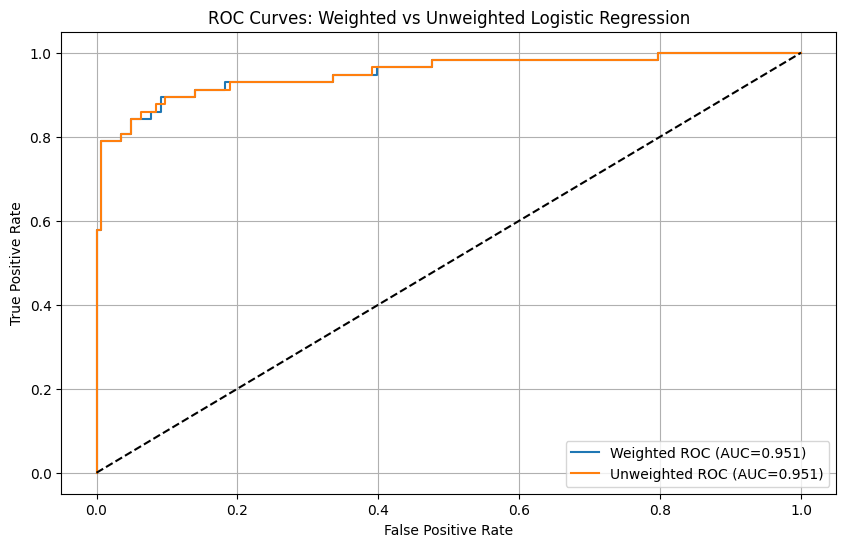

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(w_fpr, w_tpr, label=f'Weighted ROC (AUC={w_auc:.3f})')
plt.plot(u_fpr, u_tpr, label=f"Unweighted ROC (AUC={u_auc:.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Weighted vs Unweighted Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

## Plot decision boundary
* This function visualizes the decision boundary of a trained logistic regression model in a 2D feature space.

1. Define grid resolution (`h=0.02`)- Creates a fine grid for moother decision boundaries.
2. Determine feature ranges (`x_min`, `x_max`, `y_min`, `y_max`)- Expands slightly beyind data points for better visualization.
3. Create meshgrid (`xx`, `yy`)-Generates a grid of feature values.
4. Predict labels over the grid (`Z=model.predict(...)`)-USes the trained model to classify each grid point.
5. Reshape predictions(`Z.reshape(xx.shape)`)-Matches the meshgrid dimensions.
6. Plot decision boundary (`plt.contourf(...)`)-Fills the background with decision regions.
7. Plot data points (`plt.scatter(..)`)-colors them based on their actual class.
8. Add labels and title (`plt.title`, `plt.xlabel`, `plt.ylabel`)- Improves readability.

In [14]:
def plot_decision_boundary(X, y, model, title):
  h=0.02
  x_min, x_max=X[:, 0].min()-1, X[:, 0].max()+1
  y_min, y_max=X[:, 1].min()-1, X[:, 1].max()+1
  xx, yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  Z=model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z=Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, alpha=0.4)
  plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
  plt.title(title)
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')

## Plot decision boundaries
* This code creates a side-by-side comparison of the decision boundaries for weighted vs unweighted logistic regression model.

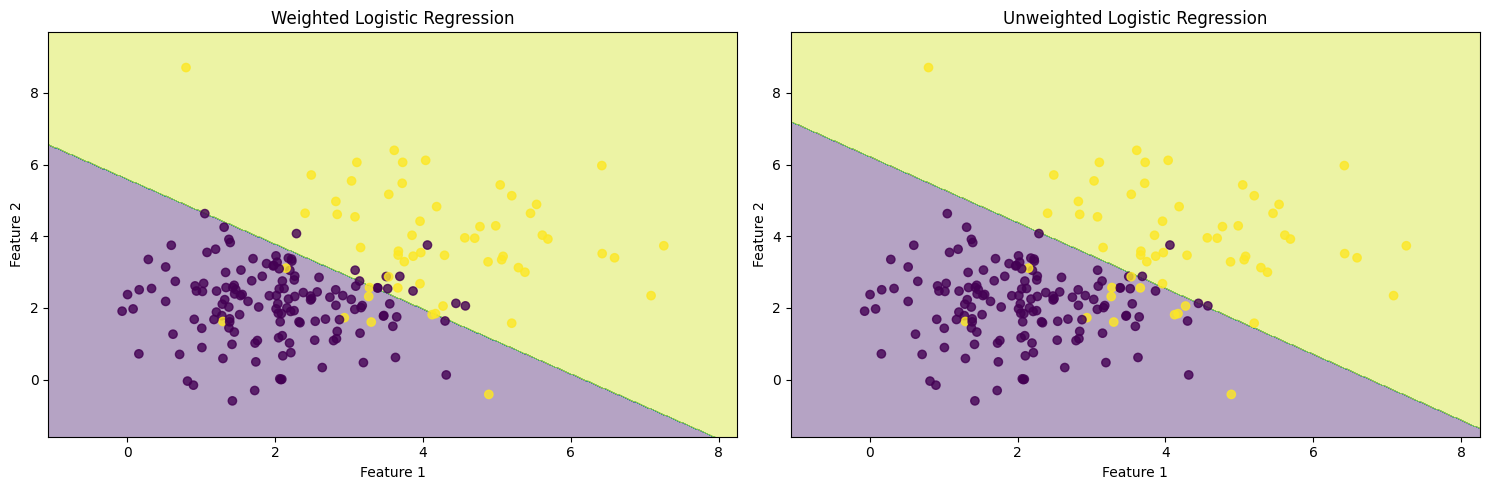

In [15]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plot_decision_boundary(X_test, y_test, weighted_model, 'Weighted Logistic Regression')
plt.subplot(122)
plot_decision_boundary(X_test, y_test, unweighted_model, 'Unweighted Logistic Regression')
plt.tight_layout()
plt.show()